In [1]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [2]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [4]:
(X_train, y_train), (X_test, y_test) = load_data() # load dataset

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [10]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Text(0.5, 1.0, 'Classes is 5')

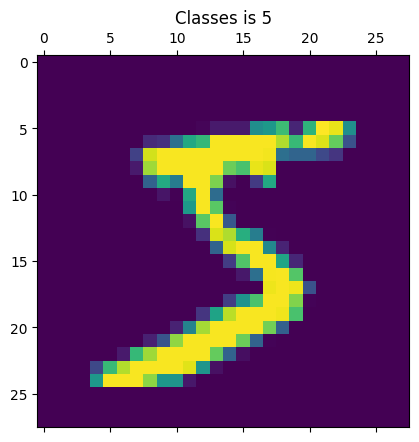

In [11]:
# Visualization 

import matplotlib.pyplot as plt

plt.matshow(X_train[0])
plt.title(f"Classes is {y_train[0]}")

Text(0.5, 1.0, 'Classes is 0')

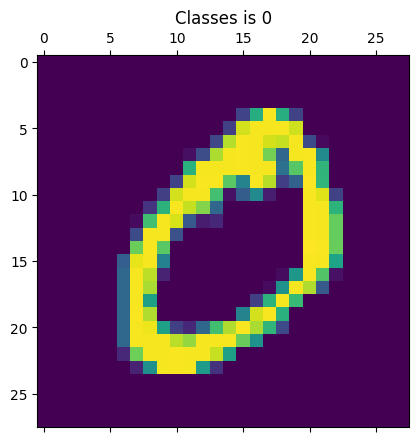

In [12]:
plt.matshow(X_train[1])
plt.title(f"Classes is {y_train[1]}")

In [13]:
# Preprocessing 
# 0 to 255
import numpy as np
np.max(X_train) , (np.min(X_train))

(255, 0)

In [ ]:
# reduction of size of image (no changes in the image per se)
X_train = X_train/255
X_test = X_test/255

In [15]:
np.max(X_train) , (np.min(X_train))

(1.0, 0.0)

In [16]:
np.max(X_test) , (np.min(X_test))

(1.0, 0.0)

In [17]:
#flaten() --> convert the multi dimension features into 1 dimension
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

In [18]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
#One hot enconding
y_train = tf.keras.utils.to_categorical(y_train)
y_test =  tf.keras.utils.to_categorical(y_test)

In [20]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [21]:
# Model

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=[784,], name="h1"))
model.add(Dense(128, activation='relu', name="h2"))
model.add(Dense(10, activation='softmax', name="output"))
model.summary()

C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ h1 (Dense)                      │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.layers[0].get_weights() # return the weights & bias

[array([[ 0.02004713,  0.06200345, -0.05177082, ...,  0.04543319,
          0.01233276,  0.03742933],
        [-0.0044822 ,  0.03752427, -0.00494894, ..., -0.00468253,
          0.00501321,  0.06956686],
        [-0.07169135, -0.0630715 ,  0.04501829, ...,  0.05675346,
          0.01951982, -0.0144492 ],
        ...,
        [-0.00280254,  0.04658625,  0.02094948, ...,  0.03423992,
         -0.04687638,  0.0059484 ],
        [ 0.06739306,  0.02954198,  0.06326114, ...,  0.02732413,
         -0.04908695, -0.01109825],
        [ 0.05552632,  0.03876879, -0.05573677, ..., -0.03216752,
          0.02506106, -0.04821699]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [23]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(x = X_train, y = y_train, epochs=25, batch_size=32, validation_data= (X_test, y_test))

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8930 - loss: 0.3566 - val_accuracy: 0.9649 - val_loss: 0.1176
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9721 - loss: 0.0939 - val_accuracy: 0.9745 - val_loss: 0.0902
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9800 - loss: 0.0649 - val_accuracy: 0.9767 - val_loss: 0.0811
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9867 - loss: 0.0446 - val_accuracy: 0.9720 - val_loss: 0.1048
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9887 - loss: 0.0383 - val_accuracy: 0.9768 - val_loss: 0.0960
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9905 - loss: 0.0313 - val_accuracy: 0.9779 - val_loss: 0.0902
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9919 - loss: 0.0269 - val_accuracy: 0.9811 - val_loss: 0.0950
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9930 - loss: 0.0245 - 

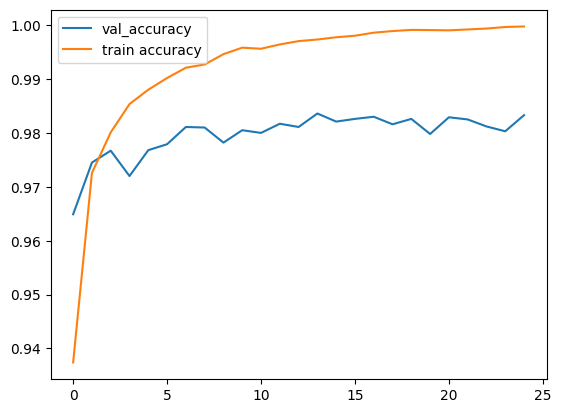

In [27]:
h = history.history

plt.plot(h['val_accuracy'], label='val_accuracy')
plt.plot(h['accuracy'], label='train accuracy')
plt.legend()
plt.show()

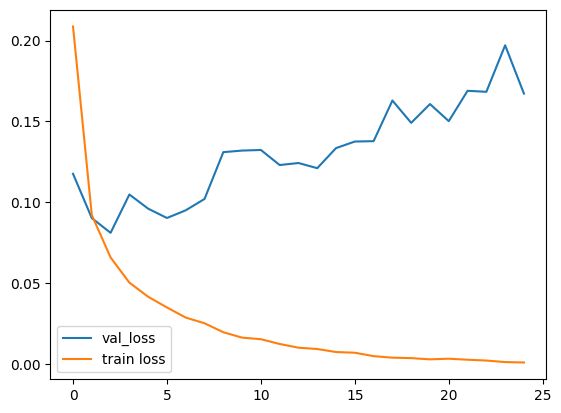

In [ ]:
plt.plot(h['val_loss'], label='val_loss') #overfitting if you visualize the loss
plt.plot(h['loss'], label='train loss')
plt.legend()
plt.show()

In [29]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9800 - loss: 0.2020


[0.16723181307315826, 0.983299970626831]